In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df=pd.read_csv('E:\Data Analysis\Classification-project\Dataset\diabetes.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kanan\AppData\Local\Temp\ipykernel_14812\3629406164.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('E:\Data Analysis\Classification-project\Dataset\diabetes.csv')


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
## for minimum 0 value in some important columns replace with mean or median of that 

In [8]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df[ 'SkinThickness']=df[ 'SkinThickness'].replace(0,df[ 'SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

<Axes: >

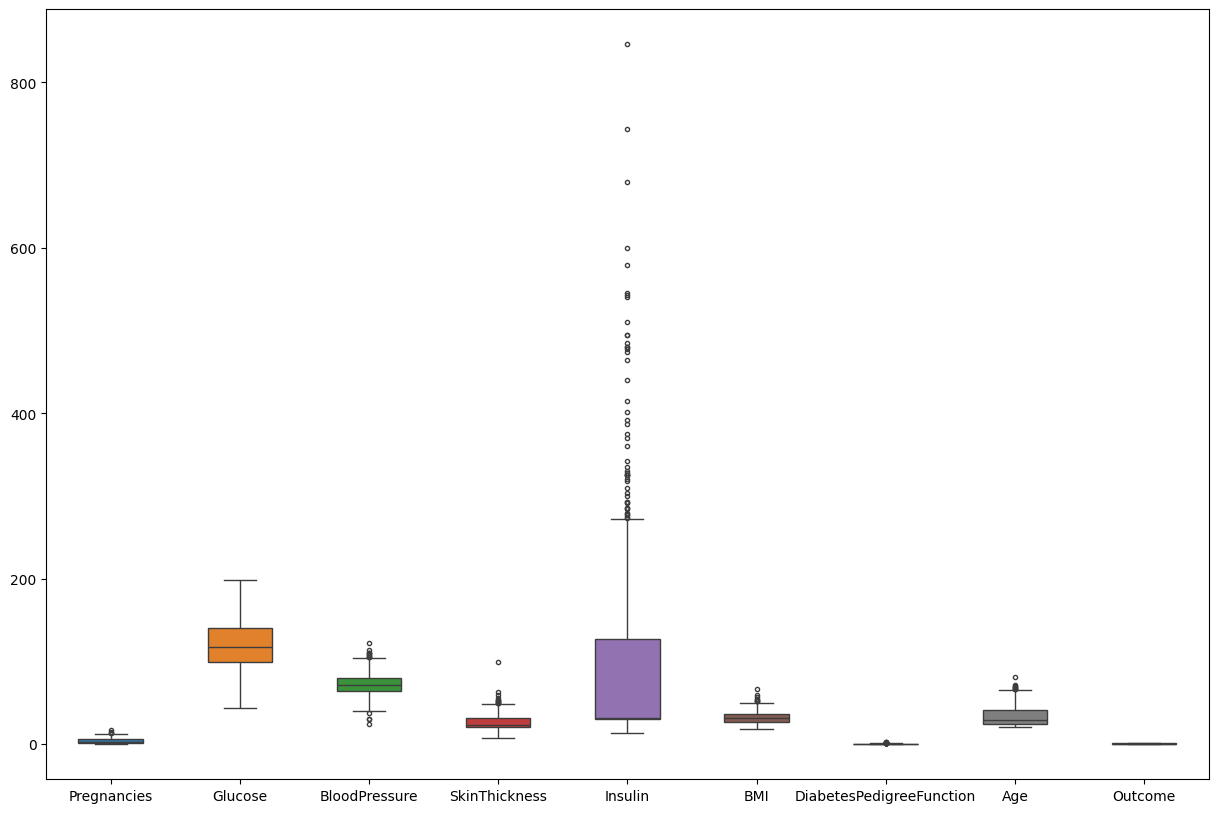

In [9]:
# visualize outlier with box plot
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)


In [10]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [12]:
import pickle
def standard_scaler(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    file=(open('E:\Data Analysis\Classification-project\models\standardScalerKNN.pkl','wb'))
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kanan\AppData\Local\Temp\ipykernel_14812\1231296777.py:7: SyntaxWarning: invalid escape sequence '\D'
  file=(open('E:\Data Analysis\Classification-project\models\standardScalerKNN.pkl','wb'))


In [13]:
X_train_scaled,X_test_scaled=standard_scaler(X_train,X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# SCALE → because KNN is distance-based
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# parameter grid
param_grid = {
    "knn__n_neighbors": range(1, 31),            # try k = 1 to 30
    "knn__weights": ["uniform", "distance"],     # equal weight or distance-weighted
    "knn__metric": ["euclidean", "manhattan"]    # common best metrics
}

# grid search
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
y_pred_KNN=grid.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))


Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}
Best CV Accuracy: 0.7881859070464767
Test Accuracy: 0.7395833333333334


In [16]:
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))
print("ACCURACY OF MODEL-->",accuracy_score(y_test,y_pred_KNN))

[[104  19]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.67      0.55      0.60        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.70       192
weighted avg       0.73      0.74      0.73       192

ACCURACY OF MODEL--> 0.7395833333333334
